# Fast AI DL1 Lesson 1 Part 2

Split into 2 parts to accomodate the limited RAM on Colab.


### To cross check if notebook is running on GPU backend

You should get **'/device:GPU:0'** if notebook is connected to GPU otherwise you will get **' '**

In [0]:
# this resets the state of the machine (e.g. if you want to re-install from scratch  
# or reset memory usage in this instance)
# wait a minute after running it and then reload the page
#!kill -9 -1

In [2]:
# require GPU before doing anything else
import tensorflow as tf
dev = tf.test.gpu_device_name()
if dev == '':
  raise Exception('No GPU!')
else :
  print(dev)

#!nvidia-smi --gpu-reset --id=0
!df -h

# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize

import psutil
import humanize
import os
import GPUtil as GPU
import gc

def print_proc_size():
  process = psutil.Process(os.getpid())
  print("proc size:" + humanize.naturalsize( process.memory_info().rss) )

# process size
def print_mem_free():
  print("available: " + humanize.naturalsize( psutil.virtual_memory().available ) )

def printm():
  # clean up the memory
  gc.collect()

  GPUs = GPU.getGPUs()
  # XXX: only one GPU on Colab and it's not guaranteed
  gpu = GPUs[0]
  
  process = psutil.Process(os.getpid())
  print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
  print('GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util: {2:3.0f}% | Total: {3:.0f}MB'.format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))

printm()



/device:GPU:0
Filesystem      Size  Used Avail Use% Mounted on
overlay         359G  5.9G  335G   2% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G  248M  6.2G   4% /usr/lib64-nvidia
/dev/root       1.2G  537M  684M  44% /opt/bin
/dev/sda1       365G  7.3G  358G   2% /etc/hosts
shm              64M     0   64M   0% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware
  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /content/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - done
  Stored in directory: /content/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 12.0 GB  | Proc size: 986.1 MB
GPU RAM Free: 564MB | Used: 10875MB | Util:  95% | Total: 11439MB


In [3]:
!pip install scipy==1.1.0

    100% |████████████████████████████████| 31.2MB 1.4MB/s 
  Found existing installation: scipy 0.19.1
    Uninstalling scipy-0.19.1:
      Successfully uninstalled scipy-0.19.1


##Additional Setup for Google Colab

###Installing Pytorch

In [4]:
#!pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl && pip install torchvision
!pip install http://download.pytorch.org/whl/cu75/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl  && pip install torchvision

    100% |████████████████████████████████| 397.4MB 50.7MB/s 
    100% |████████████████████████████████| 61kB 2.3MB/s 
    100% |████████████████████████████████| 2.0MB 7.6MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


###Installing fastai

In [5]:


# fix Failed to display Jupyter Widget of type HBox (but still shows warning: Widget Javascript not detected...)

#!pip uninstall -y fastai
#!pip install fastai
#!pip install git+https://github.com/stas00/fastai
!pip install https://github.com/fastai/fastai/archive/master.zip 
#!pip install git+https://github.com/jfpettit/fastai

    100% |████████████████████████████████| 89.9MB 339kB/s 
    100% |████████████████████████████████| 1.3MB 6.6MB/s 
    100% |████████████████████████████████| 1.5MB 5.6MB/s 
    100% |████████████████████████████████| 112kB 17.2MB/s 
    100% |████████████████████████████████| 174kB 14.4MB/s 
    48% |███████████████▋                | 10.2MB 36.0MB/s eta 0:00:01

    100% |████████████████████████████████| 20.9MB 1.7MB/s 
    100% |████████████████████████████████| 3.4MB 11.4MB/s 
    100% |████████████████████████████████| 112kB 23.5MB/s 
    100% |████████████████████████████████| 51kB 8.8MB/s 
    100% |████████████████████████████████| 51kB 16.0MB/s 
    78% |█████████████████████████▏      | 1.7MB 37.4MB/s eta 0:00:01

    100% |████████████████████████████████| 2.2MB 12.1MB/s 
    100% |████████████████████████████████| 61kB 19.3MB/s 
    100% |████████████████████████████████| 552kB 24.0MB/s 
    100% |████████████████████████████████| 4.2MB 9.8MB/s 
    100% |████████████████████████████████| 13.7MB 3.2MB/s 
    100% |████████████████████████████████| 92kB 16.0MB/s 
    100% |████████████████████████████████| 5.7MB 10.6MB/s 
    100% |████████████████████████████████| 471kB 23.5MB/s 
    100% |████████████████████████████████| 860kB 20.7MB/s 
    100% |████████████████████████████████| 81kB 8.3MB/s 


    100% |████████████████████████████████| 71kB 17.7MB/s 
  Cache entry deserialization failed, entry ignored
    100% |████████████████████████████████| 102kB 21.8MB/s 
    100% |████████████████████████████████| 61kB 20.9MB/s 
    100% |████████████████████████████████| 81kB 8.6MB/s 
  Running setup.py bdist_wheel for fastai ... - \ done
  Stored in directory: /tmp/pip-ephem-wheel-cache-2xgkj03v/wheels/64/3d/9f/d12a217aa2531321c5b9ae96288fcae2687d3b744376e8f94f
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | /

 - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /content/.cache/pip/wheels/9f/78/26/fb8c0acb91a100dc8914bf236c4eaa4b207cb876893c40b745
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /content/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for kaggle-cli ... - done
  Stored in directory: /content/.cache/pip/wheels/d5/bb/10/c1dd1b08c7433c943cb55c46367ae3f891415e8a37300ff8a7
  Running setup.py bdist_wheel for pandas-summary ... - done
  Stored in directory: /content/.cache/pip/wheels/86/a9/6b/36b727a9ec687dac08bd3d0501cddd7b1a223943513eb04a03
  Running setup.py bdist_wheel for torchtext ... - \ done
  Stored in directory: /content/.cache/pip/wheels/42/a6/f4/b267328bde6bb680094a0c173e8e56

###Installing libSM

The import of fastai is will throw an error that this library is missing. So, Installing the same.

In [6]:
!apt install -y libsm6 libxext6

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


###Downloading the dataset

In [7]:
mkdir data && wget http://files.fast.ai/data/dogscats.zip && unzip -q dogscats.zip -d data/

--2018-05-08 15:34:30--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  16.5MB/s    in 40s     

2018-05-08 15:35:10 (20.5 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



## Image classification with Convolutional Neural Networks. Part 2

## Setup

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Here we import the libraries we need. We'll learn about what each does during the course.

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [11]:
PATH = "data/dogscats/"
printm()

Gen RAM Free: 12.0 GB  | Proc size: 1.1 GB
GPU RAM Free: 564MB | Used: 10875MB | Util:  95% | Total: 11439MB


## Improving our model

### Data augmentation

If you try training for more epochs, you'll notice that we start to *overfit*, which means that our model is learning to recognize the specific images in the training set, rather than generalizaing such that we also get good results on the validation set. One way to fix this is to effectively create more data, through *data augmentation*. This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.

We can do this by passing `aug_tfms` (*augmentation transforms*) to `tfms_from_model`, with a list of functions to apply that randomly change the image however we wish. For photos that are largely taken from the side (e.g. most photos of dogs and cats, as opposed to photos taken from the top down, such as satellite imagery) we can use the pre-defined list of functions `transforms_side_on`. We can also specify random zooming of images up to specified scale by adding the `max_zoom` parameter.

In [12]:
arch=resnet34
#sz=60
sz=28

printm()
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

Gen RAM Free: 12.0 GB  | Proc size: 1.1 GB
GPU RAM Free: 564MB | Used: 10875MB | Util:  95% | Total: 11439MB


In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

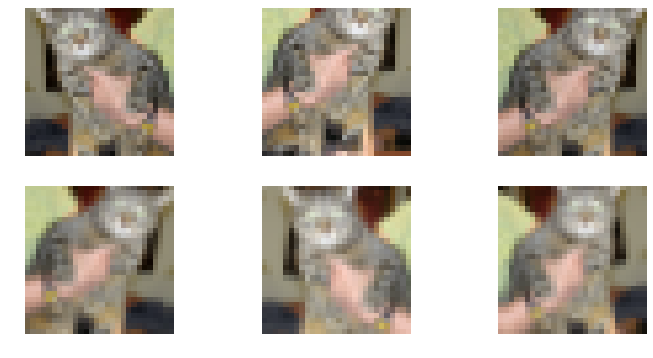

In [15]:
plots(ims, rows=2)

Let's create a new `data` object that includes this augmentation in the transforms.

In [16]:

data = ImageClassifierData.from_paths(PATH, tfms=tfms, bs=8)
learn = ConvLearner.pretrained(arch, data, precompute=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:04<00:00, 19602291.17it/s]


100%|██████████| 250/250 [00:09<00:00, 27.25it/s]


In [17]:
printm()
learn.fit(1e-2, 1)

Gen RAM Free: 10.8 GB  | Proc size: 2.4 GB
GPU RAM Free: 287MB | Used: 11152MB | Util:  97% | Total: 11439MB


epoch      trn_loss   val_loss   accuracy   
    0      0.560124   0.502956   0.754     



[array([0.50296]), 0.754]

In [0]:
learn.precompute=False

By default when we create a learner, it sets all but the last layer to *frozen*. That means that it's still only updating the weights in the last layer when we call `fit`.

In [19]:
printm()
learn.fit(1e-2, 3, cycle_len=1)
printm()


Gen RAM Free: 10.7 GB  | Proc size: 2.5 GB
GPU RAM Free: 269MB | Used: 11170MB | Util:  98% | Total: 11439MB


epoch      trn_loss   val_loss   accuracy   
    0      0.540751   0.513385   0.7425    
 18%|█▊        | 530/2875 [00:25<01:51, 21.08it/s, loss=0.553]

    1      0.522218   0.488455   0.7665    
  0%|          | 0/2875 [00:00<?, ?it/s, loss=0.527]

    2      0.566738   0.498463   0.758     

Gen RAM Free: 10.6 GB  | Proc size: 2.6 GB
GPU RAM Free: 269MB | Used: 11170MB | Util:  98% | Total: 11439MB


What is that `cycle_len` parameter? What we've done here is used a technique called *stochastic gradient descent with restarts (SGDR)*, a variant of *learning rate annealing*, which gradually decreases the learning rate as training progresses. This is helpful because as we get closer to the optimal weights, we want to take smaller steps.

However, we may find ourselves in a part of the weight space that isn't very resilient - that is, small changes to the weights may result in big changes to the loss. We want to encourage our model to find parts of the weight space that are both accurate and stable. Therefore, from time to time we increase the learning rate (this is the 'restarts' in 'SGDR'), which will force the model to jump to a different part of the weight space if the current area is "spikey". Here's a picture of how that might look if we reset the learning rates 3 times (in this paper they call it a "cyclic LR schedule"):

<img src="https://github.com/fastai/fastai/raw/master/courses/dl1/images/sgdr.png" width="80%">
(From the paper [Snapshot Ensembles](https://arxiv.org/abs/1704.00109)).

The number of epochs between resetting the learning rate is set by `cycle_len`, and the number of times this happens is refered to as the *number of cycles*, and is what we're actually passing as the 2nd parameter to `fit()`. So here's what our actual learning rates looked like:

Gen RAM Free: 10.6 GB  | Proc size: 2.6 GB
GPU RAM Free: 269MB | Used: 11170MB | Util:  98% | Total: 11439MB
Gen RAM Free: 10.6 GB  | Proc size: 2.6 GB
GPU RAM Free: 269MB | Used: 11170MB | Util:  98% | Total: 11439MB


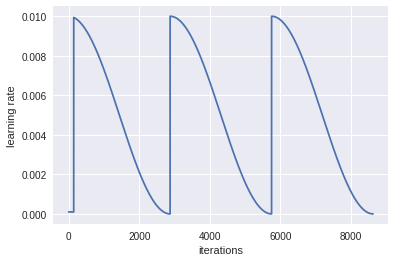

In [20]:
printm()
learn.sched.plot_lr()
printm()


Our validation loss isn't improving much, so there's probably no point further training the last layer on its own.

Since we've got a pretty good model at this point, we might want to save it so we can load it again later without training it from scratch.

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

### Fine-tuning and differential learning rate annealing

Now that we have a good final layer trained, we can try fine-tuning the other layers. To tell the learner that we want to unfreeze the remaining layers, just call (surprise surprise!) `unfreeze()`.

In [23]:
learn.unfreeze()
printm()


Gen RAM Free: 10.6 GB  | Proc size: 2.6 GB
GPU RAM Free: 269MB | Used: 11170MB | Util:  98% | Total: 11439MB


Note that the other layers have *already* been trained to recognize imagenet photos (whereas our final layers where randomly initialized), so we want to be careful of not destroying the carefully tuned weights that are already there.

Generally speaking, the earlier layers (as we've seen) have more general-purpose features. Therefore we would expect them to need less fine-tuning for new datasets. For this reason we will use different learning rates for different layers: the first few layers will be at 1e-4, the middle layers at 1e-3, and our FC layers we'll leave at 1e-2 as before. We refer to this as *differential learning rates*, although there's no standard name for this techique in the literature that we're aware of.

In [24]:
lr=np.array([1e-4,1e-3,1e-2])
printm()


Gen RAM Free: 10.6 GB  | Proc size: 2.6 GB
GPU RAM Free: 269MB | Used: 11170MB | Util:  98% | Total: 11439MB


In [25]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)
printm()


epoch      trn_loss   val_loss   accuracy   
    0      0.504453   0.493084   0.7835    
 15%|█▌        | 435/2875 [00:36<03:26, 11.83it/s, loss=0.536]

    1      0.489217   0.448113   0.8185    
  0%|          | 0/2875 [00:00<?, ?it/s, loss=0.485]

    2      0.459872   0.421459   0.8215    
  0%|          | 0/2875 [00:00<?, ?it/s, loss=0.461]

    3      0.477993   0.449046   0.831     
  0%|          | 0/2875 [00:00<?, ?it/s, loss=0.474]

    4      0.46839    0.42141    0.821     
  0%|          | 0/2875 [00:00<?, ?it/s, loss=0.465]

    5      0.451602   0.416085   0.8435    
  0%|          | 0/2875 [00:00<?, ?it/s, loss=0.448]

    6      0.416137   0.391531   0.8435    

Gen RAM Free: 10.6 GB  | Proc size: 2.6 GB
GPU RAM Free: 92MB | Used: 11347MB | Util:  99% | Total: 11439MB


Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

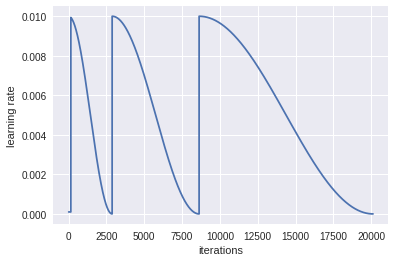

In [26]:
learn.sched.plot_lr()

Note that's what being plotted above is the learning rate of the *final layers*. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates as we initially requested (i.e. the first layers have 100x smaller, and middle layers 10x smaller learning rates, since we set `lr=np.array([1e-4,1e-3,1e-2])`.

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [29]:
printm()
log_preds,y = learn.TTA()
log_preds

Gen RAM Free: 10.6 GB  | Proc size: 2.6 GB
GPU RAM Free: 92MB | Used: 11347MB | Util:  99% | Total: 11439MB


array([[[-0.15804, -1.9229 ],
        [-0.94355, -0.49306],
        [-0.71573, -0.67106],
        ...,
        [-1.09979, -0.40488],
        [-2.35478, -0.09973],
        [-1.50283, -0.25167]],

       [[-0.10632, -2.294  ],
        [-0.73425, -0.65366],
        [-0.53621, -0.87938],
        ...,
        [-1.24403, -0.33999],
        [-2.59198, -0.07782],
        [-2.07647, -0.13396]],

       [[-0.10572, -2.29937],
        [-0.62601, -0.76512],
        [-0.40063, -1.10836],
        ...,
        [-1.59701, -0.22628],
        [-2.36284, -0.09888],
        [-2.33447, -0.10188]],

       [[-0.09475, -2.40351],
        [-0.56982, -0.83385],
        [-0.3623 , -1.19097],
        ...,
        [-1.49116, -0.25504],
        [-1.4914 , -0.25497],
        [-1.70709, -0.20015]],

       [[-0.15346, -1.95009],
        [-1.16387, -0.37437],
        [-0.83539, -0.56864],
        ...,
        [-0.91462, -0.51194],
        [-2.88094, -0.05772],
        [-2.53454, -0.08262]]], dtype=float32)

In [35]:


print(y)
probs = np.mean(np.exp(log_preds), 0)
print(probs)


[0 0 0 ... 1 1 1]
[[0.88399 0.11601]
 [0.45635 0.54365]
 [0.57469 0.42531]
 ...
 [0.28989 0.71011]
 [0.10902 0.89098]
 [0.14108 0.85892]]


In [36]:
accuracy_np(probs, y)

0.856

I generally see about a 10-20% reduction in error on this dataset when using TTA at this point, which is an amazing result for such a quick and easy technique!

### Fine-tuning and differential learning rate annealing

Now that we have a good final layer trained, we can try fine-tuning the other layers. To tell the learner that we want to unfreeze the remaining layers, just call (surprise surprise!) `unfreeze()`.

In [37]:
learn.unfreeze()
printm()

Gen RAM Free: 10.6 GB  | Proc size: 2.6 GB
GPU RAM Free: 92MB | Used: 11347MB | Util:  99% | Total: 11439MB


Note that the other layers have *already* been trained to recognize imagenet photos (whereas our final layers where randomly initialized), so we want to be careful of not destroying the carefully tuned weights that are already there.

Generally speaking, the earlier layers (as we've seen) have more general-purpose features. Therefore we would expect them to need less fine-tuning for new datasets. For this reason we will use different learning rates for different layers: the first few layers will be at 1e-4, the middle layers at 1e-3, and our FC layers we'll leave at 1e-2 as before. We refer to this as *differential learning rates*, although there's no standard name for this techique in the literature that we're aware of.

In [0]:
lr=np.array([1e-4,1e-3,1e-2])

In [39]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.388135   0.389835   0.842     
 15%|█▌        | 436/2875 [00:36<03:25, 11.85it/s, loss=0.448]

    1      0.438209   0.408214   0.834     
  0%|          | 0/2875 [00:00<?, ?it/s, loss=0.437]

    2      0.411237   0.379001   0.8415    
  0%|          | 0/2875 [00:00<?, ?it/s, loss=0.408]

    3      0.398537   0.395265   0.8255    
  0%|          | 0/2875 [00:00<?, ?it/s, loss=0.4]

    4      0.379015   0.397887   0.8465    
  0%|          | 0/2875 [00:00<?, ?it/s, loss=0.381]

    5      0.37575    0.392398   0.843     
  0%|          | 0/2875 [00:00<?, ?it/s, loss=0.378]

    6      0.364562   0.377341   0.8345    



[array([0.37734]), 0.8345]

Another trick we've used here is adding the `cycle_mult` parameter. Take a look at the following chart, and see if you can figure out what the parameter is doing:

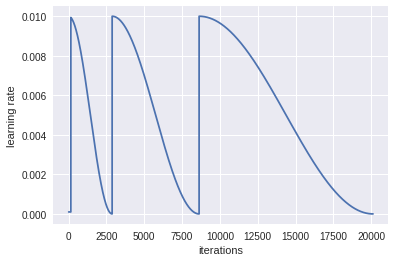

In [40]:
learn.sched.plot_lr()

Note that's what being plotted above is the learning rate of the *final layers*. The learning rates of the earlier layers are fixed at the same multiples of the final layer rates as we initially requested (i.e. the first layers have 100x smaller, and middle layers 10x smaller learning rates, since we set `lr=np.array([1e-4,1e-3,1e-2])`.

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

There is something else we can do with data augmentation: use it at *inference* time (also known as *test* time). Not surprisingly, this is known as *test time augmentation*, or just *TTA*.

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). It then takes the average prediction from these images, and uses that. To use TTA on the validation set, we can use the learner's `TTA()` method.

In [43]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [44]:
printm()
accuracy_np(probs, y)

Gen RAM Free: 10.6 GB  | Proc size: 2.6 GB
GPU RAM Free: 92MB | Used: 11347MB | Util:  99% | Total: 11439MB


0.858

I generally see about a 10-20% reduction in error on this dataset when using TTA at this point, which is an amazing result for such a quick and easy technique!

## Analyzing results

### Confusion matrix 

In [0]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

A common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

We can just print out the confusion matrix, or we can show a graphical view (which is mainly useful for dependents with a larger number of categories).

[[823 177]
 [107 893]]


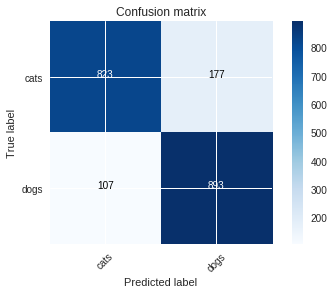

In [47]:
plot_confusion_matrix(cm, data.classes)

### Looking at pictures again

Most incorrect cats


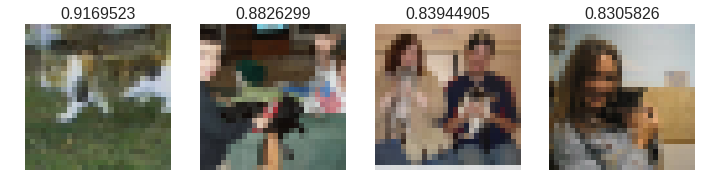

In [48]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask((preds == data.val_y)==is_correct & (data.val_y == y), mult)
  
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)
  
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


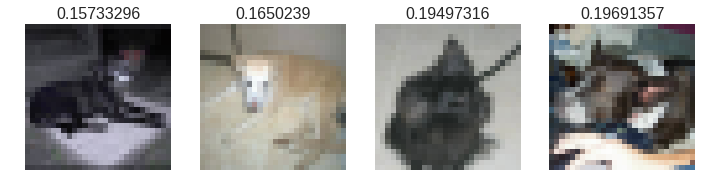

In [49]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

## Review: easy steps to train a world-class image classifier

1. Enable data augmentation, and precompute=True
1. Use `lr_find()` to find highest learning rate where loss is still clearly improving
1. Train last layer from precomputed activations for 1-2 epochs
1. Train last layer with data augmentation (i.e. precompute=False) for 2-3 epochs with cycle_len=1
1. Unfreeze all layers
1. Set earlier layers to 3x-10x lower learning rate than next higher layer
1. Use `lr_find()` again
1. Train full network with cycle_mult=2 until over-fitting

## Understanding the code for our first model

Let's look at the Dogs v Cats code line by line.

**tfms** stands for *transformations*. `tfms_from_model` takes care of resizing, image cropping, initial normalization (creating data with (mean,stdev) of (0,1)), and more.

In [0]:
tfms = tfms_from_model(resnet34, sz)

We need a <b>path</b> that points to the dataset. In this path we will also store temporary data and final results. `ImageClassifierData.from_paths` reads data from a provided path and creates a dataset ready for training.

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)

`ConvLearner.pretrained` builds *learner* that contains a pre-trained model. The last layer of the model needs to be replaced with the layer of the right dimensions. The pretained model was trained for 1000 classes therfore the final layer predicts a vector of 1000 probabilities. The model for cats and dogs needs to output a two dimensional vector. The diagram below shows in an example how this was done in one of the earliest successful CNNs. The layer "FC8" here would get replaced with a new layer with 2 outputs.

<img src="https://image.slidesharecdn.com/practicaldeeplearning-160329181459/95/practical-deep-learning-16-638.jpg" width="500">
[original image](https://image.slidesharecdn.com/practicaldeeplearning-160329181459/95/practical-deep-learning-16-638.jpg)

In [0]:
learn = ConvLearner.pretrained(resnet34, data, precompute=True)

*Parameters*  are learned by fitting a model to the data. *Hyparameters* are another kind of parameter, that cannot be directly learned from the regular training process. These parameters express “higher-level” properties of the model such as its complexity or how fast it should learn. Two examples of hyperparameters are the *learning rate* and the *number of epochs*.

During iterative training of a neural network, a *batch* or *mini-batch* is a subset of training samples used in one iteration of Stochastic Gradient Descent (SGD). An *epoch* is a single pass through the entire training set which consists of multiple iterations of SGD.

We can now *fit* the model; that is, use *gradient descent* to find the best parameters for the fully connected layer we added, that can separate cat pictures from dog pictures. We need to pass two hyperameters: the *learning rate* (generally 1e-2 or 1e-3 is a good starting point, we'll look more at this next) and the *number of epochs* (you can pass in a higher number and just stop training when you see it's no longer improving, then re-run it with the number of epochs you found works well.)

In [53]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.555489   0.493714   0.765     



[array([0.49371]), 0.765]

## Analyzing results: loss and accuracy

When we run `learn.fit` we print 3 performance values (see above.) Here 0.03 is the value of the **loss** in the training set, 0.0226 is the value of the loss in the validation set and 0.9927 is the validation accuracy. What is the loss? What is accuracy? Why not to just show accuracy?

**Accuracy** is the ratio of correct prediction to the total number of predictions.

In machine learning the **loss** function or cost function is representing the price paid for inaccuracy of predictions.

The loss associated with one example in binary classification is given by:
`-(y * log(p) + (1-y) * log (1-p))`
where `y` is the true label of `x` and `p` is the probability predicted by our model that the label is 1.

In [0]:
def binary_loss(y, p):
    return np.mean(-(y * np.log(p) + (1-y)*np.log(1-p)))

In [55]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

Note that in our toy example above our accuracy is 100% and our loss is 0.16. Compare that to a loss of 0.03 that we are getting while predicting cats and dogs. Exercise: play with `preds` to get a lower loss for this example. 

**Example:** Here is an example on how to compute the loss for one example of binary classification problem. Suppose for an image x with label 1 and your model gives it a prediction of 0.9. For this case the loss should be small because our model is predicting a label $1$ with high probability.

`loss = -log(0.9) = 0.10`

Now suppose x has label 0 but our model is predicting 0.9. In this case our loss is should be much larger.

loss = -log(1-0.9) = 2.30

- Exercise: look at the other cases and convince yourself that this make sense.
- Exercise: how would you rewrite `binary_loss` using `if` instead of `*` and `+`?

Why not just maximize accuracy? The binary classification loss is an easier function to optimize.

In [56]:
printm()

Gen RAM Free: 10.5 GB  | Proc size: 2.7 GB
GPU RAM Free: 18MB | Used: 11421MB | Util: 100% | Total: 11439MB
